In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from prettytable import PrettyTable

from plotly.subplots import make_subplots


#Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgbm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor




from catboost import CatBoostRegressor

#from sklego.linear_model import LADRegression
from xgboost import XGBRegressor
from scipy.stats import yeojohnson
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# **2. Data Collection**

In [2]:
import pandas as pd

# Definisikan nama file
filename = "booking_dataset_2024_06_03_with_nan.csv"

# Membaca dataset dari file CSV
raw_data = pd.read_csv(filename)
df = raw_data
data_eda =raw_data

# Menampilkan 5 baris pertama dari dataset
raw_data.head()

,booking_id,booking_status,booking_check_in,booking_check_out,booking_guest_number,booking_currency,booking_received_timestamp,listing_id,review_sentiment,review_sentiment_score,...,workspace,pool,parking,gym,kitchen,property_id1,area_id,area_name,area_distance_to_airport,airport_pickup_price_idr
0,2REFMR,1,2016-04-06,2016-04-16,NaN,2,NaN,6384209,positive,0.655466,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0
1,9NBTPK,1,2016-04-02,2016-04-05,NaN,2,NaN,945876,positive,0.656976,...,1.0,1.0,1.0,0.0,1.0,PR0242,A0012,Nusa Dua,45 minutes,325000.0
2,A2SQJN,1,2016-10-06,2016-10-08,NaN,2,NaN,945876,positive,0.687372,...,1.0,1.0,1.0,0.0,1.0,PR0242,A0012,Nusa Dua,45 minutes,325000.0
3,AKJCTJ,1,2015-10-30,2015-11-04,NaN,2,NaN,6384209,positive,0.979358,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0
4,B3T92M,1,2016-10-10,2016-10-14,NaN,2,NaN,6384209,positive,0.670770,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0


In [3]:
df = raw_data
data_eda =raw_data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  56825 non-null  object 
 1   booking_status              56825 non-null  int64  
 2   booking_check_in            56825 non-null  object 
 3   booking_check_out           56825 non-null  object 
 4   booking_guest_number        9015 non-null   float64
 5   booking_currency            56825 non-null  int64  
 6   booking_received_timestamp  30445 non-null  object 
 7   listing_id                  56825 non-null  object 
 8   review_sentiment            6030 non-null   object 
 9   review_sentiment_score      6030 non-null   float64
 10  cancellation_policy         0 non-null      float64
 11  booking_earned_in_idr       51166 non-null  float64
 12  length_of_stay              56825 non-null  int64  
 13  booking_window              304

In [5]:
raw_data.describe()

,booking_status,booking_guest_number,booking_currency,review_sentiment_score,cancellation_policy,booking_earned_in_idr,length_of_stay,booking_window,seasonality,average_daily_rate,...,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,9015.000000,56825.000000,6030.000000,0.0,5.116600e+04,56825.000000,30445.000000,56825.000000,5.116600e+04,...,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.063968,2.618525,1.233295,0.729690,NaN,2.578506e+06,2.839366,23.068944,0.372107,8.505980e+05,...,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.281550,2.274074,0.427279,0.413806,NaN,4.703238e+06,2.982119,36.979856,0.483371,1.018562e+06,...,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,0.000000,1.000000,-0.998203,NaN,0.000000e+00,-30.000000,0.000000,0.000000,-4.938270e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,2.000000,1.000000,0.704758,NaN,6.367480e+05,1.000000,1.000000,0.000000,3.492000e+05,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,1.000000,0.887651,NaN,1.236796e+06,2.000000,6.000000,0.000000,5.130320e+05,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,2.000000,1.000000,0.972097,NaN,2.520008e+06,3.000000,31.000000,1.000000,9.409000e+05,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,6.000000,30.000000,3.000000,0.999999,NaN,1.303185e+08,349.000000,383.000000,1.000000,2.129842e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [6]:
raw_data.isnull().sum()

booking_id                        0
booking_status                    0
booking_check_in                  0
booking_check_out                 0
booking_guest_number          47810
booking_currency                  0
booking_received_timestamp    26380
listing_id                        0
review_sentiment              50795
review_sentiment_score        50795
cancellation_policy           56825
booking_earned_in_idr          5659
length_of_stay                    0
booking_window                26380
seasonality                       0
average_daily_rate             5659
unit_id                          14
status                          447
bedroom                         513
bathroom                      11595
beds                          11595
capacity                      15556
property_id                     447
avg_daily_rate_per_unit        5659
wifi                          14743
tv                            14743
cable_tv                      14743
ac                          

# **3. EDA** 

**Analisis Data Eksplorasi (EDA)** adalah salah satu teknik yang digunakan untuk mengekstraksi fitur dan tren vital yang digunakan oleh pembelajaran mesin dan model pembelajaran mendalam dalam Sains Data. Memahami data secara menyeluruh membutuhkan eksplorasi dari setiap aspek. Fitur yang berdampak memungkinkan pengambilan keputusan yang bermakna dan bermanfaat; oleh karena itu, EDA menempati tempat yang tak ternilai dalam Sains Data.

**Types of Exploratory Data Analysis**

1. Univariate
2. Bivariate
3. Multivariate


In [7]:
mask = df['area_name'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=mask['area_name'],
        title="Top 10 Frequent of area",
                  titlefont={'size':18, 'family': 'Serif',},
         values=mask['count'],
        hole=0.5,
        )
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )
fig.layout.update(title="<b>Count of daerah properti<b>",
                  titlefont={'size':24, 'family': 'Serif',},
                  showlegend=False, 
                  height=700, 
                  width=700, 
                  template=None, 
                 )

fig.show()

In [8]:
import plotly.graph_objects as go

# Assuming df is already defined
mask = df['property_id'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

print(mask.columns)  # To verify the column names

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mask.iloc[:, 0],  # Using iloc to access the first column
        y=mask['count'],
        text=mask['percentage'],
        textposition='auto',
    )
)

fig.update_layout(
    title="<b>Count of Property ID<b>",
    titlefont={'size':24, 'family': 'Serif'},
    xaxis_title="Property ID",
    yaxis_title="Count",
    showlegend=False,
    height=700,
    width=700,
    template=None,
)

fig.show()


Index(['property_id', 'count', 'percentage'], dtype='object')


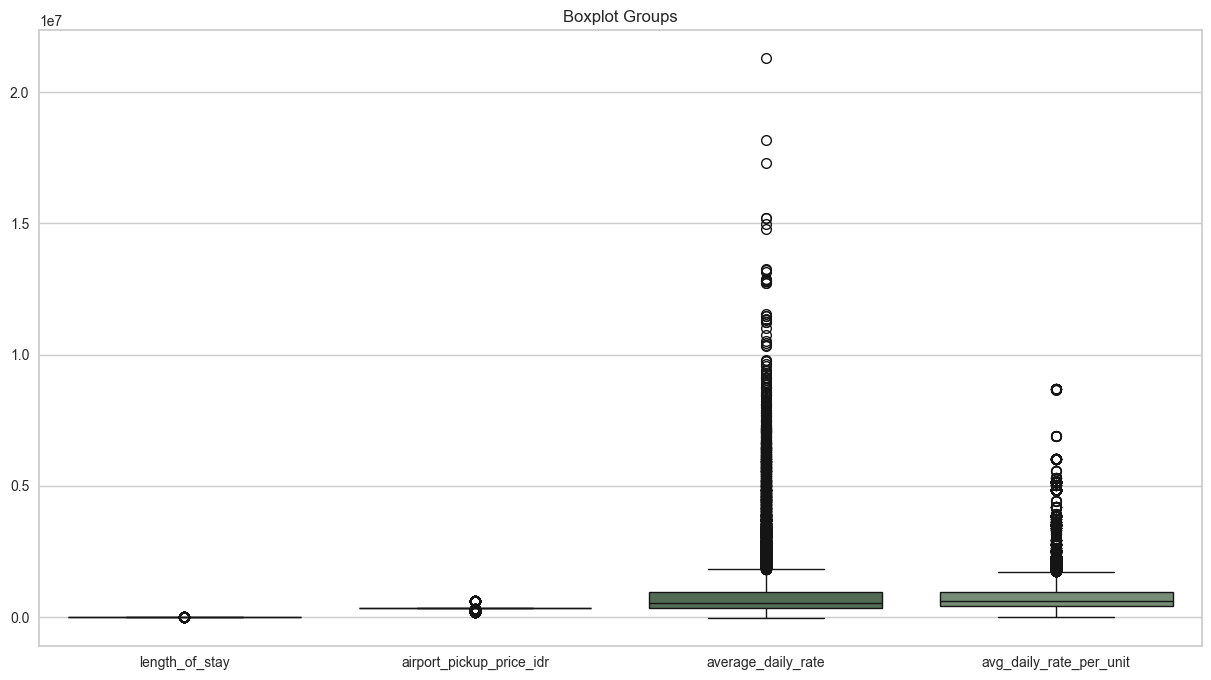

Lower, Upper Bounds, and Median for Quartiles:
+--------------------------+-------------------+--------------------+-----------+
|          Column          |    Lower Bound    |    Upper Bound     |   Median  |
+--------------------------+-------------------+--------------------+-----------+
|      length_of_stay      |        1.0        |        6.0         |    2.00   |
| airport_pickup_price_idr |      325000.0     |      325000.0      | 325000.00 |
|    average_daily_rate    |      349200.0     |     1828450.0      | 513032.00 |
| avg_daily_rate_per_unit  | 408481.8570931922 | 1727508.0258894828 | 592991.52 |
+--------------------------+-------------------+--------------------+-----------+


In [9]:
columns = df[['length_of_stay', 'airport_pickup_price_idr','average_daily_rate', 'avg_daily_rate_per_unit']]
pal = ['#163020', '#3A4D39', '#4F6F52', '#739072', '#98BF97', '#B1DEAF', '#B9E8B7', '#C7F7C6']

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

In [10]:
cols = [col for col in df.columns if df[col].dtype != 'object'][1:]
corr = df[cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix (cont. features)<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=1000, height=750,
                  margin=dict(l=150, r=100, b=100, t=100),
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()


## **4 Data Pre-Prosessing**

**Data Pre-Prosessing** adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik sebelum melakukan modeling.


In [11]:

raw_data['booking_check_in'] = pd.to_datetime(raw_data['booking_check_in'])
raw_data['booking_check_out'] = pd.to_datetime(raw_data['booking_check_out'])

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if 'hour' in time_str:
        hours = int(time_str.split()[0])
        return hours * 60
    elif 'minute' in time_str:
        minutes = int(time_str.split()[0])
        return minutes
    else:
        return None

raw_data['area_distance_to_airport'] = raw_data['area_distance_to_airport'].apply(convert_to_minutes)

raw_data['booking_check_in_date'] = raw_data['booking_check_in'].dt.day
raw_data['booking_check_in_month'] = raw_data['booking_check_in'].dt.month
raw_data['booking_check_in_year'] = raw_data['booking_check_in'].dt.year

raw_data['booking_check_out_date'] = raw_data['booking_check_out'].dt.day
raw_data['booking_check_out_month'] = raw_data['booking_check_out'].dt.month
raw_data['booking_check_out_year'] = raw_data['booking_check_out'].dt.year



In [12]:
raw_data = raw_data.drop(['booking_id','booking_check_in','booking_check_out','booking_received_timestamp','cancellation_policy','status','booking_window'
], axis = 1)


In [13]:
raw_data.isnull().sum()

booking_status                  0
booking_guest_number        47810
booking_currency                0
listing_id                      0
review_sentiment            50795
review_sentiment_score      50795
booking_earned_in_idr        5659
length_of_stay                  0
seasonality                     0
average_daily_rate           5659
unit_id                        14
bedroom                       513
bathroom                    11595
beds                        11595
capacity                    15556
property_id                   447
avg_daily_rate_per_unit      5659
wifi                        14743
tv                          14743
cable_tv                    14743
ac                          14743
workspace                   14743
pool                        14743
parking                     14743
gym                         14743
kitchen                     14743
property_id1                  578
area_id                       578
area_name                     578
area_distance_

In [14]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk kolom unit_id
raw_data['listing_id'] = label_encoder.fit_transform(raw_data['listing_id'])

raw_data['review_sentiment'] = label_encoder.fit_transform(raw_data['review_sentiment'])

raw_data['property_id1'] = label_encoder.fit_transform(raw_data['property_id1'])


raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['property_id'] = label_encoder.fit_transform(raw_data['property_id'])

raw_data['area_id'] = label_encoder.fit_transform(raw_data['area_id'])

raw_data['area_name'] = label_encoder.fit_transform(raw_data['area_name'])

print(raw_data[['unit_id', 'review_sentiment','listing_id','property_id', 'area_id', 'area_name']].head())


   unit_id  review_sentiment  listing_id  property_id  area_id  area_name
0      335                 2        1817          154       11         13
1      334                 2        1893          192       11         13
2      334                 2        1893          192       11         13
3      335                 2        1817          154       11         13
4      335                 2        1817          154       11         13


In [15]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['bedroom', 'bathroom', 'beds', 'capacity','wifi','tv','cable_tv','ac','workspace','pool',
                          'booking_guest_number','parking','gym','kitchen']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
booking_earned_in_idr        5659
length_of_stay                  0
seasonality                     0
average_daily_rate           5659
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
avg_daily_rate_per_unit      5659
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
property_id1                    0
area_id                         0
are

In [16]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['booking_check_in_date','booking_check_in_month','booking_check_in_year',
                          'booking_check_in_year','booking_check_out_month','booking_check_out_year']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
booking_earned_in_idr        5659
length_of_stay                  0
seasonality                     0
average_daily_rate           5659
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
avg_daily_rate_per_unit      5659
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
property_id1                    0
area_id                         0
are

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
columns_to_impute = [ 'airport_pickup_price_idr','area_distance_to_airport','review_sentiment_score']
imputer = IterativeImputer(max_iter=10, random_state=0)

# Memilih subset data untuk kolom-kolom yang akan diimputasi
data_to_impute = raw_data[columns_to_impute]

# Melakukan imputasi
data_imputed = imputer.fit_transform(data_to_impute)

# Mengganti nilai yang telah diimputasi kembali ke dataset asli
raw_data[columns_to_impute] = data_imputed

# Menampilkan hasil imputasi
print("Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:")
print(raw_data[columns_to_impute].head())
raw_data.isnull().sum()

Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:
   airport_pickup_price_idr  area_distance_to_airport  review_sentiment_score
0                  325000.0                      45.0                0.655466
1                  325000.0                      45.0                0.656976
2                  325000.0                      45.0                0.687372
3                  325000.0                      45.0                0.979358
4                  325000.0                      45.0                0.670770


booking_status                 0
booking_guest_number           0
booking_currency               0
listing_id                     0
review_sentiment               0
review_sentiment_score         0
booking_earned_in_idr       5659
length_of_stay                 0
seasonality                    0
average_daily_rate          5659
unit_id                        0
bedroom                        0
bathroom                       0
beds                           0
capacity                       0
property_id                    0
avg_daily_rate_per_unit     5659
wifi                           0
tv                             0
cable_tv                       0
ac                             0
workspace                      0
pool                           0
parking                        0
gym                            0
kitchen                        0
property_id1                   0
area_id                        0
area_name                      0
area_distance_to_airport       0
airport_pi

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
columns_to_impute = ['booking_earned_in_idr','average_daily_rate','avg_daily_rate_per_unit']
imputer = IterativeImputer(max_iter=10, random_state=0)

# Memilih subset data untuk kolom-kolom yang akan diimputasi
data_to_impute = raw_data[columns_to_impute]

# Melakukan imputasi
data_imputed = imputer.fit_transform(data_to_impute)

# Mengganti nilai yang telah diimputasi kembali ke dataset asli
raw_data[columns_to_impute] = data_imputed

# Menampilkan hasil imputasi
print("Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:")
print(raw_data[columns_to_impute].head())
raw_data.isnull().sum()

Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:
   booking_earned_in_idr  average_daily_rate  avg_daily_rate_per_unit
0            33785261.68        3.378526e+06             5.126228e+06
1            12943833.32        4.314611e+06             4.843822e+06
2            11364687.81        5.682344e+06             4.843822e+06
3            29848669.00        5.969734e+06             5.126228e+06
4            25526762.17        6.381691e+06             5.126228e+06


booking_status              0
booking_guest_number        0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
booking_earned_in_idr       0
length_of_stay              0
seasonality                 0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
avg_daily_rate_per_unit     0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
property_id1                0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_ch

In [19]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Create the new feature 'room_pricing'

raw_data['booking_earned_in_idr'] = raw_data['booking_earned_in_idr'] / raw_data['length_of_stay']
# Step 1: Ganti nilai non-finite dengan 0 atau nilai lain yang sesuai
raw_data['booking_earned_in_idr'].replace([np.inf, -np.inf], np.nan, inplace=True)
raw_data['booking_earned_in_idr'].fillna(0, inplace=True)

# Step 2: Ubah tipe data kolom 'booking_earned_in_idr' menjadi integer
raw_data['booking_earned_in_idr'] = raw_data['booking_earned_in_idr'].astype(int)


# Step 2: Drop the 'booking_earned_in_idr' column


In [20]:
data = raw_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_status            56825 non-null  int64  
 1   booking_guest_number      56825 non-null  float64
 2   booking_currency          56825 non-null  int64  
 3   listing_id                56825 non-null  int32  
 4   review_sentiment          56825 non-null  int32  
 5   review_sentiment_score    56825 non-null  float64
 6   booking_earned_in_idr     56825 non-null  int32  
 7   length_of_stay            56825 non-null  int64  
 8   seasonality               56825 non-null  int64  
 9   average_daily_rate        56825 non-null  float64
 10  unit_id                   56825 non-null  int64  
 11  bedroom                   56825 non-null  float64
 12  bathroom                  56825 non-null  float64
 13  beds                      56825 non-null  float64
 14  capaci

In [21]:
data.isnull().sum()

booking_status              0
booking_guest_number        0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
booking_earned_in_idr       0
length_of_stay              0
seasonality                 0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
avg_daily_rate_per_unit     0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
property_id1                0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_ch

In [22]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['booking_earned_in_idr'])
y = data['booking_earned_in_idr']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi dari data latih dan data uji
print("Dimensi data latih:", X_train.shape, y_train.shape)
print("Dimensi data uji:", X_test.shape, y_test.shape)

Dimensi data latih: (45460, 36) (45460,)
Dimensi data uji: (11365, 36) (11365,)


In [23]:
y = data['booking_earned_in_idr']
x = data.drop('booking_earned_in_idr', axis=1)

In [24]:
# apply transformation since it is skewed as we saw in the eda phase
data['booking_earned_in_idr'] = np.log1p(data['booking_earned_in_idr'])

In [25]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi Min-Max pada fitur numerik
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Gabungkan kembali fitur yang sudah dinormalisasi dengan label
data_normalized = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [26]:
# apply polynomial since the features are not very linear with the label, and set the degree to 2 to prevent overfitting
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x)

### MODELING

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold
import pandas as pd

class Model:
    def __init__(self, x, y, n_splits, repeated, rdm_seed, model, params):
        self.x = x
        self.y = y
        self.n_splits = n_splits
        self.repeated = repeated
        self.rdm_seed = rdm_seed
        self.model = model
        self.params = params
        self.cv_splitter = None
        self.best_model = None
        self.best_rmse = float('inf')
        self.best_mae = float('inf')  # Initialize best_mae attribute

    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x[train_idx]
            X_val = self.x[val_idx]
            y_train = self.y[train_idx]
            y_val = self.y[val_idx]
            yield X_train, X_val, y_train, y_val

    def fit(self, key):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = self.model(**self.params)  # Define model outside if-elif block
            if key == 'xgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100, verbose=False)
            elif key == 'adaboost':
                model = self._fit_adaboost(X_train, y_train)
            elif key == 'lgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae')
            elif key == 'cat':
                model = CatBoostRegressor(**self.params, loss_function='MAE')
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
            elif key == 'bayesian_ridge':
                model = BayesianRidge(**self.params)
                model.fit(X_train, y_train)
            elif key in ['linear', 'ridge', 'lasso', 'svr']:
                model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_val_preds)
            r2 = r2_score(y_val, y_val_preds)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")
            mae_per_fold.append(mae)
            r2_per_fold.append(r2)

            # Select the model with the lowest MAE
            if mae < self.best_mae:
                self.best_mae = mae
                self.best_model = model

        print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
        print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

    def predict(self):
        if self.best_model is None:
            raise ValueError("Model has not been trained yet. Call 'fit()' method first.")

        all_mae = []
        all_r2 = []
        y_preds_list = []
        y_val_list = []

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.split_data()):
            y_preds = self.best_model.predict(X_val)
            mae = mean_absolute_error(y_val, y_preds)
            r2 = r2_score(y_val, y_preds)
            all_mae.append(mae)
            all_r2.append(r2)
            y_preds_list.append(y_preds)
            y_val_list.append(y_val)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")

        avg_mae = np.mean(all_mae)
        avg_r2 = np.mean(all_r2)
        print(f'Average MAE Val: {avg_mae:.5f} | Average R2 Val: {avg_r2:.5f}')
        return all_mae, all_r2, y_preds_list, y_val_list

    def feature_importance(self):
        feature_importances = self.best_model.feature_importances_
        n_original_features = len(x.columns)
        polynomial_feature_indices = np.arange(n_original_features, self.x.shape[1])
        polynomial_feature_names = [f"Poly_{i}" for i in polynomial_feature_indices]
        all_feature_names = list(x.columns) + polynomial_feature_names
        feature_importances_df = pd.DataFrame({'feature_weight': feature_importances}, index=all_feature_names)
        feature_importances_df = feature_importances_df.sort_values('feature_weight', ascending=False)
        return feature_importances_df

    def inverse(self, y_preds, y_val):
        y_preds = np.expm1(y_preds)
        y_val = np.expm1(y_val)
        return y_preds, y_val


In [28]:
    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x.iloc[train_idx]
            X_val = self.x.iloc[val_idx]
            y_train = self.y.iloc[train_idx]
            y_val = self.y.iloc[val_idx]
            yield X_train, X_val, y_train, y_val


In [29]:
    def fit(self, key):
        if key == 'xgb':
            self._fit_xgb()
        elif key == 'lgb':
            self._fit_lgb()
        elif key == 'cat':
            self._fit_cat()



In [30]:
def _fit_xgb(self):
    import xgboost as xgb
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = xgb.XGBRegressor(**self.params)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100, verbose=False)
        eval_results = model.evals_result()
        val_mae = eval_results['validation_0']['mae'][-1]
        
        y_val_preds = model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_preds)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R2: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

In [31]:
    def _fit_adaboost(self, X_train, y_train):
        from sklearn.ensemble import AdaBoostRegressor
        base_estimator = DecisionTreeRegressor(max_depth=1)
        adaboost = AdaBoostRegressor(base_estimator=base_estimator, **self.params)
        adaboost.fit(X_train, y_train)
        return adaboost

In [32]:
def _fit_lgb(self):
    import lightgbm as lgb
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = lgb.LGBMRegressor(**self.params)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100)
        eval_results = model.evals_result_
        val_mae = eval_results['valid_0']['l1'][-1]
        
        y_val_preds = model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_preds)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R2: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

In [33]:
def _fit_cat(self):
    from catboost import CatBoostRegressor
    from sklearn.metrics import mean_absolute_error, r2_score
    rmse_per_fold = []
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = CatBoostRegressor(**self.params, loss_function='MAE')
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        y_pred = model.predict(X_val)

        val_mae = mean_absolute_error(y_val, y_pred)
        val_r2 = r2_score(y_val, y_pred)

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R² across all folds: {np.mean(r2_per_fold):.5f}")

In [34]:
    def predict(self):
        self.cv_splitter = self.split_data()
        all_rmse = []
        all_rmse_train = []
        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            if self.best_model is None:
                raise ValueError("Model has not been trained yet. Call 'fit()' method first.")
            else:
                y_preds = self.best_model.predict(X_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_preds))
                all_rmse.append(rmse)

                train_preds = self.best_model.predict(X_train)
                train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
                all_rmse_train.append(train_rmse)
                print(f"FOLD {fold} | RMSE: {rmse:.5f}")
        avg_rmse = np.mean(all_rmse)
        avg_rmse_train = np.mean(all_rmse_train)
        print(f'Average RMSE Val: {avg_rmse} | Average RMSE Train: {avg_rmse_train}')
        return all_rmse, y_preds, y_val


In [41]:
params = {'random_state':42}


model_xgb = Model(X_train_poly, y, 10, 3, 42, XGBRegressor, params)
model_xgb.fit('xgb')

feature_importances_xgb = model_xgb.feature_importance()


all_mae_xgb,all_r2_xgb, y_preds, y_val = model_xgb.predict()

FOLD 0 | MAE: 6401.57542 | R2: 0.99649
FOLD 1 | MAE: 6188.91614 | R2: 0.99876
FOLD 2 | MAE: 7629.61184 | R2: 0.99606
FOLD 3 | MAE: 5583.44896 | R2: 0.99929
FOLD 4 | MAE: 7296.09353 | R2: 0.98558
FOLD 5 | MAE: 7502.35414 | R2: 0.98811
FOLD 6 | MAE: 7229.51759 | R2: 0.98813
FOLD 7 | MAE: 6099.36143 | R2: 0.99818
FOLD 8 | MAE: 5677.20435 | R2: 0.99911
FOLD 9 | MAE: 5885.34682 | R2: 0.99888
FOLD 10 | MAE: 7340.44280 | R2: 0.99270
FOLD 11 | MAE: 6292.18970 | R2: 0.99825
FOLD 12 | MAE: 6078.85850 | R2: 0.99847
FOLD 13 | MAE: 5616.06736 | R2: 0.99945
FOLD 14 | MAE: 6350.78060 | R2: 0.99706
FOLD 15 | MAE: 6054.57531 | R2: 0.99825
FOLD 16 | MAE: 7010.76354 | R2: 0.98479
FOLD 17 | MAE: 9590.90662 | R2: 0.98170
FOLD 18 | MAE: 5708.01147 | R2: 0.99931
FOLD 19 | MAE: 5740.86846 | R2: 0.99929
FOLD 20 | MAE: 5486.93529 | R2: 0.99908
FOLD 21 | MAE: 5681.91937 | R2: 0.99854
FOLD 22 | MAE: 7522.06214 | R2: 0.98858
FOLD 23 | MAE: 5882.60939 | R2: 0.99896
FOLD 24 | MAE: 6961.49781 | R2: 0.99796
FOLD 25 | 

In [38]:
params = {'random_state':42,'verbosity':-1}
model_lgbm = Model(X_train_poly, y, 10, 3, 42, lgbm.LGBMRegressor, params)


# Fit the model using RepeatedKFold
model_lgbm.fit('lgb')

all_mae_lgb,all_r2_lgb, y_preds, y_val = model_lgbm.predict()
feature_importances_lgbm = model_lgbm.feature_importance()


FOLD 0 | MAE: 6540.03413 | R2: 0.99720
FOLD 1 | MAE: 5462.05065 | R2: 0.99899
FOLD 2 | MAE: 7090.49162 | R2: 0.99452
FOLD 3 | MAE: 5704.20504 | R2: 0.99927
FOLD 4 | MAE: 6677.53786 | R2: 0.98883
FOLD 5 | MAE: 6963.04269 | R2: 0.99304
FOLD 6 | MAE: 7994.83822 | R2: 0.98134
FOLD 7 | MAE: 6469.45270 | R2: 0.99751
FOLD 8 | MAE: 5300.75156 | R2: 0.99898
FOLD 9 | MAE: 6098.02872 | R2: 0.99901
FOLD 10 | MAE: 6588.12743 | R2: 0.99431
FOLD 11 | MAE: 5970.07682 | R2: 0.99867
FOLD 12 | MAE: 6362.72742 | R2: 0.99839
FOLD 13 | MAE: 5495.34468 | R2: 0.99928
FOLD 14 | MAE: 6644.65193 | R2: 0.99488
FOLD 15 | MAE: 6740.23184 | R2: 0.99657
FOLD 16 | MAE: 6661.79666 | R2: 0.98277
FOLD 17 | MAE: 8274.88076 | R2: 0.98796
FOLD 18 | MAE: 6418.52326 | R2: 0.99596
FOLD 19 | MAE: 5774.57365 | R2: 0.99907
FOLD 20 | MAE: 6440.53347 | R2: 0.99629
FOLD 21 | MAE: 5794.38102 | R2: 0.99921
FOLD 22 | MAE: 8112.76419 | R2: 0.98195
FOLD 23 | MAE: 5477.15360 | R2: 0.99932
FOLD 24 | MAE: 7450.02727 | R2: 0.99194
FOLD 25 | 

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Parameter untuk Ridge Regression
params_ridge = {'alpha': 1.0}
model_ridge = Model(X_train_poly, y, 10, 3, 42, Ridge, params_ridge)
model_ridge.fit('ridge')
all_mae_ridge,all_r2_ridge, y_preds_ridge, y_val_ridge = model_ridge.predict()

FOLD 0 | MAE: 119393.30064 | R2: 0.93897
FOLD 1 | MAE: 123820.95880 | R2: 0.94062
FOLD 2 | MAE: 120070.71352 | R2: 0.94727
FOLD 3 | MAE: 115722.66229 | R2: 0.95215
FOLD 4 | MAE: 123381.78883 | R2: 0.92608
FOLD 5 | MAE: 119919.06444 | R2: 0.93422
FOLD 6 | MAE: 120393.04534 | R2: 0.94636
FOLD 7 | MAE: 121117.42175 | R2: 0.94612
FOLD 8 | MAE: 118741.43504 | R2: 0.94503
FOLD 9 | MAE: 119578.82481 | R2: 0.93943
FOLD 10 | MAE: 121748.01091 | R2: 0.65386
FOLD 11 | MAE: 117993.04337 | R2: 0.94404
FOLD 12 | MAE: 123857.55160 | R2: 0.93602
FOLD 13 | MAE: 121320.89992 | R2: 0.94004
FOLD 14 | MAE: 122398.54676 | R2: 0.94339
FOLD 15 | MAE: 121751.43297 | R2: 0.94152
FOLD 16 | MAE: 119240.86953 | R2: 0.94564
FOLD 17 | MAE: 118219.16920 | R2: 0.93740
FOLD 18 | MAE: 119627.72528 | R2: 0.94197
FOLD 19 | MAE: 124442.13758 | R2: 0.91023
FOLD 20 | MAE: 118044.70001 | R2: 0.94295
FOLD 21 | MAE: 119963.21424 | R2: 0.94011
FOLD 22 | MAE: 118015.64960 | R2: 0.95397
FOLD 23 | MAE: 121877.58256 | R2: 0.90848
FO

In [40]:
# Parameter untuk Linear Regression
params_linear = {}
model_linear = Model(X_train_poly, y, 10, 3, 42, LinearRegression, params_linear)
model_linear.fit('linear')

all_mae_linear,all_r2_linier, y_preds_linear, y_val_linear = model_linear.predict()

FOLD 0 | MAE: 119999.86909 | R2: 0.93808
FOLD 1 | MAE: 125078.71906 | R2: 0.94045
FOLD 2 | MAE: 121037.61472 | R2: 0.94547
FOLD 3 | MAE: 115725.25588 | R2: 0.95210
FOLD 4 | MAE: 123316.93685 | R2: 0.92656
FOLD 5 | MAE: 119906.65627 | R2: 0.93420
FOLD 6 | MAE: 121163.39837 | R2: 0.94622
FOLD 7 | MAE: 122204.73064 | R2: 0.94593
FOLD 8 | MAE: 120809.50619 | R2: 0.94489
FOLD 9 | MAE: 123662.33227 | R2: 0.89293
FOLD 10 | MAE: 114807.93950 | R2: 0.94401
FOLD 11 | MAE: 118319.76376 | R2: 0.94387
FOLD 12 | MAE: 124021.00826 | R2: 0.93694
FOLD 13 | MAE: 121763.56172 | R2: 0.93980
FOLD 14 | MAE: 122805.02858 | R2: 0.94334
FOLD 15 | MAE: 122765.92493 | R2: 0.94124
FOLD 16 | MAE: 119946.28655 | R2: 0.94546
FOLD 17 | MAE: 122235.85395 | R2: 0.87204
FOLD 18 | MAE: 119993.09980 | R2: 0.94178
FOLD 19 | MAE: 124227.92782 | R2: 0.92680
FOLD 20 | MAE: 119073.44692 | R2: 0.94286
FOLD 21 | MAE: 120317.59586 | R2: 0.93990
FOLD 22 | MAE: 119270.92037 | R2: 0.95370
FOLD 23 | MAE: 120345.92429 | R2: 0.94022
FO

In [49]:
import plotly.express as px

# Ambil 10 fitur teratas
top_10_features = feature_importances_xgb.nlargest(10, 'feature_weight')
feature_importances_xgb = a[a['index'].isin(x.columns)]


fig = px.bar(
    x=top_10_features['feature_weight'],
    y=top_10_features['index'],  # Ganti 'nama_fitur' dengan nama kolom yang berisi nama fitur Anda
    orientation='h',
    width=700,
    height=500,
)

fig.update_layout(
    autosize=False,
    title="Top 10 Feature Importances by XGB",
    font_family="San Serif",
    titlefont={'size': 20},
    margin=dict(l=150, r=100, b=100, t=100),
     xaxis_title="Feature Weight",
     yaxis_title=""
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

colors = ['gray',] * 10
colors[0]  = 'lightseagreen'
colors[-1] = 'lightsalmon'
fig.update_traces(marker_color=colors, marker_line_color=None,
                   opacity=None)

fig.show()


In [50]:
import plotly.express as px

# Ambil 10 fitur teratas
top_10_features = feature_importances_lgbm.nlargest(10, 'feature_weight')
feature_importances_lgbm = a[a['index'].isin(x.columns)]


fig = px.bar(
    x=top_10_features['feature_weight'],
    y=top_10_features['index'],
    orientation='h',
    width=700,
    height=500,
)

fig.update_layout(
    autosize=False,
    title="Top 10 Feature Importances by LGBM",
    font_family="San Serif",
    titlefont={'size': 20},
    margin=dict(l=150, r=100, b=100, t=100),
     xaxis_title="Feature Weight",
     yaxis_title=""
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

colors = ['gray',] * 10
colors[0]  = 'lightseagreen'
colors[-1] = 'lightsalmon'
fig.update_traces(marker_color=colors, marker_line_color=None,
                   opacity=None)

fig.show()
